# APS1070
#### Basic Principles and Models - Project 1
**Deadline: Sep 27, 23:59 - 14 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Hanzhe Fan  

Student ID: 1002522834

##**Marking Scheme:**

This project is worth **14 marks** of your final grade.

Draw a plot or table where necessary to summarize your findings.

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).



# Project 1 [14 Marks]
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

## Part 1: Getting started [4 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[1]**
* How many features do we have in this dataset? 30
* What are the target classes? ['malignant', 'benign']
* What do these target classes signify?  0 represents for Malignant,1 represents for Benign
* How many participants tested `Malignant`? 212
* How many participants tested `Benign`? 357

In [ ]:
# Part1 (1)
import numpy as np
# from sklearn.datasets import load_breast_cancer
feature_data = dataset.data
target_data= dataset.target

print ('How many features do we have in this dataset?', feature_data.shape[1])
print ('What are the target classes?', dataset.target_names)
print ('How many participants tested Malignant?', np.sum(target_data == 0))
print ('How many participants tested Benign?', np.sum(target_data == 1))
print ('How many participants tested Malignant?', np.sum(target_data == 0))
print ('What do these target classes signify?', dataset.DESCR) # the signified classes can be obtained in description

How many features do we have in this dataset? 30
What are the target classes? ['malignant' 'benign']
How many participants tested Malignant? 212
How many participants tested Benign? 357
How many participants tested Malignant? 212
What do these target classes signify? .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fracta

Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the dataset. Draw a plot where the x-axis is "mean radius", the y-axis is "mean texture," and the color of each datapoint indicates its class. Do this once again for different features for the x- and y-axis and see how the data is distributed. **[1]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Why? **[1]**

It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however). To tune `k` (our hyperparameter), we employ cross-validation ([Help](https://scikit-learn.org/stable/modules/cross_validation.html)). Cross-validation automatically selects validation subsets from the data that you provided. Split the dataset into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[1]**

**

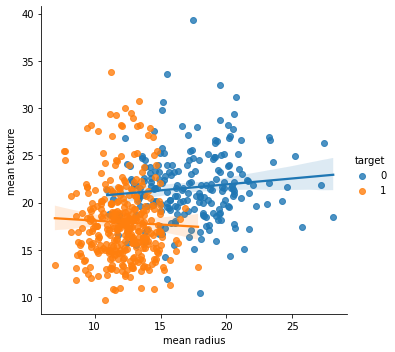

In [ ]:
# Part1 (2)
import seaborn as sns
import pandas as pd

#creat a dataframe with feature data
df = pd.DataFrame(feature_data)
#assign the feature name into dataframe column
df.columns = dataset.feature_names
df['target']=target_data
sns.lmplot(
    x = 'mean radius',
    y = 'mean texture',
    hue = 'target' , #divided data into 2 classes by target
    data = df        # 0 represents for Malignant
    )                # 1 represents for Benign



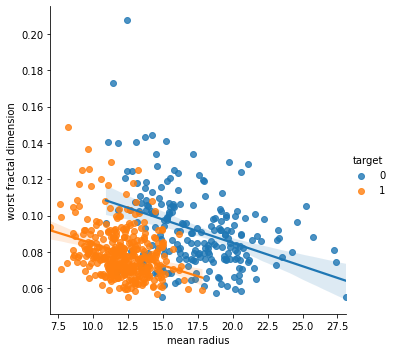

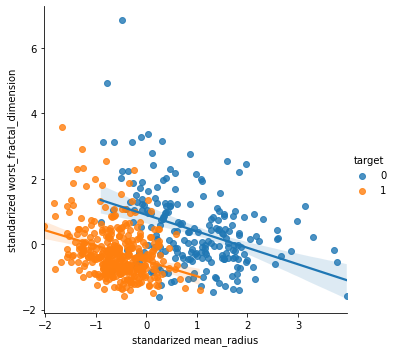

In [ ]:
# Part1 (3)
#copy a new dataframe which is same as df
df1 = df.copy()
#plot of non-standardized data
sns.lmplot(
    x = 'mean radius',
    y = 'worst fractal dimension',
    hue = 'target' , #divided data into 2 classes by target
    data = df1        # 0 represents for Malignant
    )                # 1 represents for Benign

#calculate the mean and standard deviation of mean raduis and worst fractal dimension
mean_meanradius = df1['mean radius'].mean()
mean_worstfractaldimension = df1['worst fractal dimension'].mean()
std_meanraduis = df1['mean radius'].std()
std_worstfractaldimension = df1['worst fractal dimension'].std()

#add the calcualted results to dataframe
df1['standarized mean_radius'] = (df1['mean radius']-mean_meanradius)/std_meanraduis
df1['standarized worst_fractal_dimension'] = (df1['worst fractal dimension']-mean_worstfractaldimension)/std_worstfractaldimension

#plot of standardized data
sns.lmplot(
x = 'standarized mean_radius',
y = 'standarized worst_fractal_dimension',
hue = 'target',
data = df1
)



In [ ]:
# Part1 (4)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.3, random_state=0)


## Part 2: KNN Classifier without Standardization [3 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor.

Follow these steps:

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? Comment on  which `k`s lead to underfitted or overfitted models. **[1]**
3.   Can you get the same accuracy (roughly) with fewer features using a KNN model? You're free to use trial-and-error to remove features (try at least 5 combinations), or use a more sophisticated approach like [Backward Elimination](https://towardsdatascience.com/backward-elimination-for-feature-selection-in-machine-learning-c6a3a8f8cef4).
Describe your findings using a graph or table (or multiple!). **[1]**



Text(0.5, 1.0, 'k vs. mean cv accuracy')

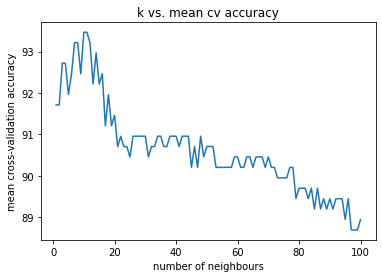

In [ ]:
# Part2 (1).
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
import matplotlib.pyplot as plt

mean_cross_val_acc = [] #creat a blank list to store different corss validation accuracy values
for i in range(1,101):
  X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.3, random_state=0)

  # use knn method with different k values from 1 to 100
  knn = neighbors.KNeighborsClassifier(n_neighbors= i)

  #fit the model with trained data
  knn.fit(X_train,y_train)
  scores = cross_val_score(knn, X_train, y_train, cv=5)
  cross_val_acc = scores.mean()*100
  mean_cross_val_acc.append(cross_val_acc) #add each cross validation accuracy in to the blank list above

k = list(range(1,101))
plt.plot(k,mean_cross_val_acc)
plt.xlabel("number of neighbours")
plt.ylabel("mean cross-validation accuracy")
plt.title('k vs. mean cv accuracy')


In [ ]:
# Part2 (2)

max_at= mean_cross_val_acc.index(max(mean_cross_val_acc))
print ('The best k of graph above is when k = ', max_at+1 ,'The best accuracy is ',max(mean_cross_val_acc),'%')

The best k of graph above is when k =  10 The best accuracy is  93.46518987341771 %


#Part2 (2): Answer

When k is smaller than 10, it leads to overfitting. And  when k is larger than 11, it leads to underfitting.


It is iterated with only 29 feature data ,  the best k is when k =  10 ,best cross validation  accuracy =  93.46518987341771 %
It is iterated with only 25 feature data ,  the best k is when k =  10 ,best cross validation  accuracy =  93.46518987341771 %
It is iterated with only 18 feature data ,  the best k is when k =  13 ,best cross validation  accuracy =  88.94936708860757 %
It is iterated with only 13 feature data ,  the best k is when k =  63 ,best cross validation  accuracy =  88.44936708860759 %
It is iterated with only 5 feature data ,  the best k is when k =  63 ,best cross validation  accuracy =  88.44936708860759 %
   feature numbers  best k  best accuracy %
1               29      10        93.465190
2               25      10        93.465190
3               18      13        88.949367
4               13      63        88.449367
5                5      63        88.449367


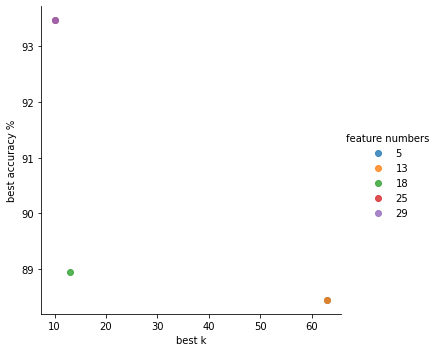

In [ ]:
# Part2 (3)

#creat two lists to store mean validation accuracy, max k and max accuracy
mean_cross_val_acc_new = []
k_max_acc = []

for j in [29,25,18,13,5]:     # number of features left after removing features
  for i in range(1,101):
    new_feature_data = df.iloc[:,:j]   #remove features
    X_new = new_feature_data    #define the new feature data
    y_new = target_data
    X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(new_feature_data, target_data, test_size=0.3, random_state=0)
    knn_new = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn_new.fit(X_new_train,y_new_train) #fit new trained data into knn model
    scores_new = cross_val_score(knn_new, X_new_train, y_new_train, cv=5)
    cross_val_acc_new = scores_new.mean()*100
    mean_cross_val_acc_new.append(cross_val_acc_new)

# find the best k value and best cross validation accuracy of each
# iternation with differnet features and add them to the list prepared above
  max_at_new = mean_cross_val_acc_new.index(max(mean_cross_val_acc_new))
  print ('It is iterated with only',j,'feature data , ','the best k is when k = ', max_at_new+1,',best cross validation  accuracy = ', max(mean_cross_val_acc_new),'%')
  k_max_acc.append([j,max_at_new+1,max(mean_cross_val_acc_new)])
  mean_cross_val_acc_new.clear() #clear the list when finish each iteration

# create a dataframe and plot to show feature numbers, best k and best accuracy
k_max_acc_array = np.asarray(k_max_acc)
df2 = pd.DataFrame(data=k_max_acc, index=["1", "2","3","4","5"], columns=["feature numbers", "best k","best accuracy %"])
print(df2)
sns.lmplot(
    x = 'best k',
    y = 'best accuracy %',
    hue = 'feature numbers' ,
    data = df2
    )


# From the results and the graph, we can see that when it runs with 29 features and 25 features,
# the best accuracies do not change at all.
# We can conclude that, when several unimportant feature data were deleted,
# it does a small impact or even no impact on the whole data.


## Part 3: Standardization [2 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one.

Note: When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Create a KNN classifier with standardized data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)), and reproduce all steps in Part 2. **[1]**

2. Does standardization lead to better model performance? Is performance better or worst? Discuss. **[1]**


Text(0.5, 1.0, 'k vs. mean cv accuracy with standardization')

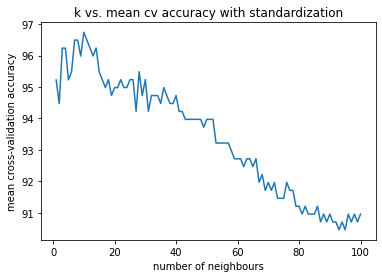

In [ ]:
#Part3 1(1)

from sklearn import preprocessing

mean_cross_val_acc_scaled = []

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(feature_data, target_data, test_size=0.3, random_state=0)
#standardize the data
X_train_scaled = preprocessing.scale(X_train_scaled) #standardize the data
X_test_scaled = preprocessing.scale(X_test_scaled)
for i in range(1,101):
  knn_scaled = neighbors.KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_scaled,y_train_scaled) # fit with standardized data into knn model
  scores_scaled = cross_val_score(knn_scaled, X_train_scaled, y_train_scaled, cv=5)
  cross_val_acc_scaled = scores_scaled.mean()*100
  mean_cross_val_acc_scaled.append(cross_val_acc_scaled)

k = list(range(1,101))
plt.plot(k,mean_cross_val_acc_scaled)
plt.xlabel("number of neighbours")
plt.ylabel("mean cross-validation accuracy")
plt.title('k vs. mean cv accuracy with standardization')



In [ ]:
#Part3. 1(2)

max_at_scaled= mean_cross_val_acc_scaled.index(max(mean_cross_val_acc_scaled))
print ('The best k is when k = ', max_at_scaled+1, 'The best accuracy is ',max(mean_cross_val_acc_scaled),'%')


The best k is when k =  10 The best accuracy is  96.74367088607593 %


It is iterated with 29 standardized feature data ,  the best k is when k =  10 ,max accuracy =  96.49050632911391 %
It is iterated with 25 standardized feature data ,  the best k is when k =  3 ,max accuracy =  96.99050632911393 %
It is iterated with 18 standardized feature data ,  the best k is when k =  4 ,max accuracy =  94.9746835443038 %
It is iterated with 13 standardized feature data ,  the best k is when k =  9 ,max accuracy =  94.98101265822785 %
It is iterated with 5 standardized feature data ,  the best k is when k =  6 ,max accuracy =  93.9746835443038 %
   feature numbers  best k  best accuracy %
1               29      10        96.490506
2               25       3        96.990506
3               18       4        94.974684
4               13       9        94.981013
5                5       6        93.974684


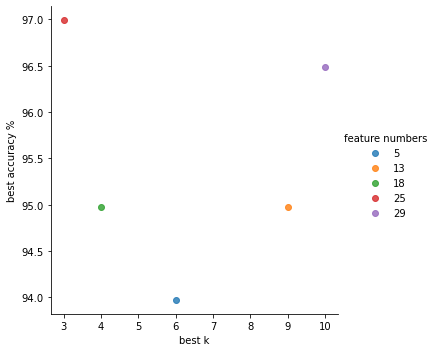

In [ ]:
#Part3. 1(3)

mean_cross_val_acc_new_scaled = []
k_max_acc_scaled= []

for j in [29,25,18,13,5]:
  feature_data_scaled = df.iloc[:,:j]  #number of features run
  #split feature data into train and test
  X_train_new_scaled, X_test_new_scaled, y_train_new_scaled, y_test_new_scaled = train_test_split(feature_data_scaled, target_data, test_size=0.3, random_state=0)
  X_train_new_scaled = preprocessing.scale(X_train_new_scaled) #standardize the data
  X_test_new_scaled = preprocessing.scale(X_test_new_scaled)
  for i in range(1,101): # sweep k from 1 to 100
    X_new_scaled = feature_data_scaled
    y_new_scaled = target_data
    knn_new_scaled = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn_new_scaled.fit(X_new_scaled,y_new_scaled)
    scores_new_scaled = cross_val_score(knn_new_scaled, X_train_new_scaled, y_train_new_scaled, cv=5)
    cross_val_acc_new_scaled = scores_new_scaled.mean()*100
    mean_cross_val_acc_new_scaled.append(cross_val_acc_new_scaled)

  max_at_new_scaled= mean_cross_val_acc_new_scaled.index(max(mean_cross_val_acc_new_scaled))
  print ('It is iterated with',j,'standardized feature data , ','the best k is when k = ', max_at_new_scaled+1,',max accuracy = ', max(mean_cross_val_acc_new_scaled),'%')
  k_max_acc_scaled.append([j,max_at_new_scaled+1,max(mean_cross_val_acc_new_scaled)])
  mean_cross_val_acc_new_scaled.clear()

# find the best k value and best cross validation accuracy of each
# iternation with differnet features and add them to the list prepared above
k_max_acc_scaled_array = np.asarray(k_max_acc_scaled) #create a dataframe to show feature number, k and max accuracy
df3 = pd.DataFrame(data=k_max_acc_scaled, index=["1", "2","3","4","5"], columns=["feature numbers", "best k","best accuracy %"])
print(df3)
sns.lmplot(
    x = 'best k',
    y = 'best accuracy %',
    hue = 'feature numbers' ,
    data = df3
    )

# From the results shown below, the max accuracy is nearly 97% with 25 feature
# data after standardization when k =3


#Part3. 2: Answer

In fact, from the results and grapphs above, we can conclude that after standardization, it has a better accuracy. Standardization can change different scales of features to be the same, which can make sure that data can be treated with equal importance and improve the accuracy.

## Part 4: Test Data [1 Mark]

Now that you've created several models, pick your best one (highest accuracy) and apply it to the test dataset you had initially set aside. Discuss. **[1]**

In [ ]:
# Part4.
from sklearn.metrics import accuracy_score

# from the results in part 3, we can know that, the hightest accuracy happens
# when the data is standardized with 25 feature data and k = 3. As a result,
# we need to subsititute this conditon into part 4.

feature_data_scaled = df.iloc[:,:25] #best accuracy happens when only has 25 features
#split and and standardize the data with same parameters in part 3
X_train_new_scaled, X_test_new_scaled, y_train_new_scaled, y_test_new_scaled = train_test_split(feature_data_scaled, target_data, test_size=0.3, random_state=0)
X_train_new_scaled = preprocessing.scale(X_train_new_scaled)
X_test_new_scaled = preprocessing.scale(X_test_new_scaled)
X_new_scaled = feature_data_scaled
y_new_scaled = target_data
knn_new_scaled = neighbors.KNeighborsClassifier(n_neighbors = 3) # best accuracy happens when k =3
knn_new_scaled.fit(X_train_new_scaled,y_train_new_scaled) # fit the trained data in to knn model
accuracy = accuracy_score(y_test_new_scaled, knn_new_scaled.predict(X_test_new_scaled)) # use test data to check the accuracy
print('Test Accuracy : ', accuracy*100,'%')

# The test accuracy is nearly 95.32%, which is a bit lower than cross validation accuracy but within acceptable range.

Test Accuracy :  95.32163742690058 %


## Part 5: New Dataset [4 Marks]
Find an appropriate classification dataset online and train a KNN model to make predictions.

*   Introduce your dataset. **[1]**
*   Create a KNN classifier using the tools you've learned. **[2]**
*   Present your results. **[1]**

Hint: you can find various datasets here: https://www.kaggle.com/datasets and here: https://scikit-learn.org/stable/datasets/index.html#toy-datasets.

To use a dataset in Colab, you can upload it in your Google drive and access it in Colab ([help here](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)), or you can download the dataset on your local machine and upload it directly to Colab using the following script.

```
from google.colab import files
uploaded = files.upload()
```

When submitting your project on Quercus, please make sure you are also uploading your dataset so we can fully run your notebook.

In [ ]:
# Part 5
from sklearn.datasets import load_wine
data = load_wine()

fea_data = data.data
targ_data= data.target

print ('How many features do we have in this dataset?', fea_data.shape[1])
print ('What are the target classes?', data.target_names)
print ('How many are Class_0?', np.sum(targ_data == 0))
print ('How many are Class_1?', np.sum(targ_data == 1))
print ('How many are Class_2?', np.sum(targ_data == 2))

How many features do we have in this dataset? 13
What are the target classes? ['class_0' 'class_1' 'class_2']
How many are Class_0? 59
How many are Class_1? 71
How many are Class_2? 48


In [ ]:
#create dataframe for fea_data
data_df = pd.DataFrame(fea_data)
data_df.columns = data.feature_names
data_df['target'] = targ_data


The best k is when k =  1 The best accuracy is  74.9 %


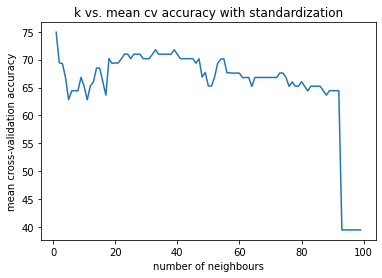

In [ ]:
# Sweep k from 1 to 99 to find the max cross validation accuracy

mean_cross_val_acc_wine= []

#split data into train and test
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(fea_data, targ_data, test_size=0.3, random_state=0)
for i in range(1,100):
  knn_wine = neighbors.KNeighborsClassifier(n_neighbors=i)
  knn_wine.fit(X_train_wine,y_train_wine) # fit with standardized data into knn model
  scores_wine = cross_val_score(knn_wine, X_train_wine, y_train_wine, cv=5)
  cross_val_acc_wine = scores_wine.mean()*100
  mean_cross_val_acc_wine.append(cross_val_acc_wine)

k_wine = list(range(1,100))
plt.plot(k_wine,mean_cross_val_acc_wine)
plt.xlabel("number of neighbours")
plt.ylabel("mean cross-validation accuracy")
plt.title('k vs. mean cv accuracy with standardization')

max_at_wine = mean_cross_val_acc_wine.index(max(mean_cross_val_acc_wine))
print ('The best k is when k = ', max_at_wine+1 ,'The best accuracy is ',max(mean_cross_val_acc_wine),'%')

The best k is when k =  18 The max accuracy is  97.6 %


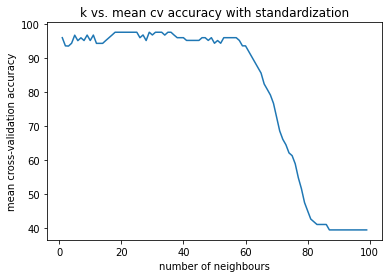

In [ ]:
# Sweep k from 1 to 99 to find the max cross validation accuracy with standardized data

mean_cross_val_acc_wine_scaled = []

X_train_wine_scaled, X_test_wine_scaled, y_train_wine_scaled, y_test_wine_scaled = train_test_split(fea_data, targ_data, test_size=0.3, random_state=0)
X_train_wine_scaled = preprocessing.scale(X_train_wine_scaled) #standardize the data
X_test_wine_scaled = preprocessing.scale(X_test_wine_scaled)
for i in range(1,100):
  knn_wine_scaled = neighbors.KNeighborsClassifier(n_neighbors=i)
  knn_wine_scaled.fit(X_train_wine_scaled,y_train_wine_scaled) # fit with standardized data into knn model
  scores_wine_scaled = cross_val_score(knn_wine_scaled, X_train_wine_scaled, y_train_wine_scaled, cv=5)
  cross_val_acc_wine_scaled = scores_wine_scaled.mean()*100
  mean_cross_val_acc_wine_scaled.append(cross_val_acc_wine_scaled)

k_wine= list(range(1,100))
plt.plot(k_wine,mean_cross_val_acc_wine_scaled)
plt.xlabel("number of neighbours")
plt.ylabel("mean cross-validation accuracy")
plt.title('k vs. mean cv accuracy with standardization')

max_at_wine_scaled = mean_cross_val_acc_wine_scaled.index(max(mean_cross_val_acc_wine_scaled))
print ('The best k is when k = ', max_at_wine_scaled+1 ,'The max accuracy is ',max(mean_cross_val_acc_wine_scaled),'%')

In [ ]:
# Test data

#from the results above, we can see that in the standardized model, the best k = 18 and
# max accuracy. So choose this model to do test accuracy

knn_wine_best = neighbors.KNeighborsClassifier(n_neighbors=18)
knn_wine_best.fit(X_train_wine_scaled,y_train_wine_scaled) # fit the trained data in to knn model
accuracy = accuracy_score(y_test_wine_scaled, knn_wine_best.predict(X_test_wine_scaled)) # use test data to check the accuracy
print('Test Accuracy : ', accuracy*100,'%')


Test Accuracy :  100.0 %
